# Annual Property Sales Trends

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import itertools

In [7]:
# Assign column headers

dict_data_types = {
        'transaction_id': 'string',
        'price': 'long',
        'date_of_transfer': 'timestamp',
        'postcode': 'string',
        'property_type': 'string',
        'old_or_new': 'string',
        'duration': 'string',
        'paon': 'string',
        'saon': 'string',
        'street': 'string',
        'locality': 'string',
        'town_city': 'string',
        'district': 'string',
        'county': 'string',
        'ppd_category': 'string',
        'record_status': 'string'
}
column_headers = list(dict_data_types.keys())

In [8]:
# Read in CSV
all_data = pd.read_csv('all-2018-08-31.csv', names=column_headers)
all_data.head()

,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status
0,{98E7C2BE-1F0F-485F-B253-1E4101F4871F},22500,1995-11-29 00:00,M22 0EJ,D,N,F,381,NaN,PORTWAY,MANCHESTER,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A
1,{0E67C43D-29A3-4EA2-B52B-1E41299744C9},86750,1995-08-18 00:00,WA15 9LP,T,N,F,23,NaN,APPLETON ROAD,HALE,ALTRINCHAM,TRAFFORD,GREATER MANCHESTER,A,A
2,{008B0E14-896F-407E-98EC-171BBA75A5A6},63200,1995-05-04 00:00,PE28 4WA,D,Y,F,15,NaN,HILLFIELD,ALCONBURY,HUNTINGDON,HUNTINGDONSHIRE,CAMBRIDGESHIRE,A,A
3,{4BCAA2AC-55A9-43C5-9FA0-171BC48CE3D3},68000,1995-06-02 00:00,S10 4DE,T,N,L,11,NaN,BARNCLIFFE DRIVE,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
4,{C428ABAE-D098-4878-8D7C-171BCD605D28},35500,1995-10-06 00:00,M28 3LE,T,N,L,30,NaN,CECIL STREET,WORSLEY,MANCHESTER,SALFORD,GREATER MANCHESTER,A,A


In [9]:
all_data['date_of_transfer'] = pd.to_datetime(all_data['date_of_transfer'], format='%Y-%m-%d')
all_data.head()

,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status
0,{98E7C2BE-1F0F-485F-B253-1E4101F4871F},22500,1995-11-29,M22 0EJ,D,N,F,381,NaN,PORTWAY,MANCHESTER,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A
1,{0E67C43D-29A3-4EA2-B52B-1E41299744C9},86750,1995-08-18,WA15 9LP,T,N,F,23,NaN,APPLETON ROAD,HALE,ALTRINCHAM,TRAFFORD,GREATER MANCHESTER,A,A
2,{008B0E14-896F-407E-98EC-171BBA75A5A6},63200,1995-05-04,PE28 4WA,D,Y,F,15,NaN,HILLFIELD,ALCONBURY,HUNTINGDON,HUNTINGDONSHIRE,CAMBRIDGESHIRE,A,A
3,{4BCAA2AC-55A9-43C5-9FA0-171BC48CE3D3},68000,1995-06-02,S10 4DE,T,N,L,11,NaN,BARNCLIFFE DRIVE,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
4,{C428ABAE-D098-4878-8D7C-171BCD605D28},35500,1995-10-06,M28 3LE,T,N,L,30,NaN,CECIL STREET,WORSLEY,MANCHESTER,SALFORD,GREATER MANCHESTER,A,A


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23554384 entries, 0 to 23554383
Data columns (total 16 columns):
transaction_id      object
price               int64
date_of_transfer    datetime64[ns]
postcode            object
property_type       object
old_or_new          object
duration            object
paon                object
saon                object
street              object
locality            object
town_city           object
district            object
county              object
ppd_category        object
record_status       object
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 2.8+ GB


In [11]:
all_data['year'] = all_data['date_of_transfer'].dt.year
all_data['month'] = all_data['date_of_transfer'].dt.month

,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status,year,month
0,{98E7C2BE-1F0F-485F-B253-1E4101F4871F},22500,1995-11-29,M22 0EJ,D,N,F,381,NaN,PORTWAY,MANCHESTER,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A,1995,11
1,{0E67C43D-29A3-4EA2-B52B-1E41299744C9},86750,1995-08-18,WA15 9LP,T,N,F,23,NaN,APPLETON ROAD,HALE,ALTRINCHAM,TRAFFORD,GREATER MANCHESTER,A,A,1995,8
2,{008B0E14-896F-407E-98EC-171BBA75A5A6},63200,1995-05-04,PE28 4WA,D,Y,F,15,NaN,HILLFIELD,ALCONBURY,HUNTINGDON,HUNTINGDONSHIRE,CAMBRIDGESHIRE,A,A,1995,5
3,{4BCAA2AC-55A9-43C5-9FA0-171BC48CE3D3},68000,1995-06-02,S10 4DE,T,N,L,11,NaN,BARNCLIFFE DRIVE,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,1995,6
4,{C428ABAE-D098-4878-8D7C-171BCD605D28},35500,1995-10-06,M28 3LE,T,N,L,30,NaN,CECIL STREET,WORSLEY,MANCHESTER,SALFORD,GREATER MANCHESTER,A,A,1995,10


In [12]:
all_data.sort_values('date_of_transfer', inplace=True)


,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status,year,month
283121,{D1C03D9C-B1A9-428E-BD87-F5348FD2BA46},40000,1995-01-01,PO2 7HQ,T,N,F,20,NaN,LOMOND CLOSE,PORTSMOUTH,PORTSMOUTH,PORTSMOUTH,PORTSMOUTH,A,A,1995,1
196737,{C1A8CE33-29C3-44EA-8099-52B91FA86597},51500,1995-01-01,NW4 4SZ,F,N,L,28,NaN,CANBERRA CLOSE,LONDON,LONDON,BARNET,GREATER LONDON,A,A,1995,1
164501,{30271714-703B-4D25-9ACA-E949676BB7AF},54000,1995-01-01,B29 7NS,T,N,F,38,NaN,FIRST AVENUE,SELLY PARK,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A,1995,1
251329,{88635130-6292-4C04-88DD-DF45CC926EEF},61000,1995-01-01,CT9 5HW,D,N,F,15,NaN,WENTWORTH AVENUE,WESTBROOK,MARGATE,THANET,KENT,A,A,1995,1
35601,{DACB05AA-0DDF-400B-BDC3-79820BC2C0BB},17000,1995-01-01,HU5 5NY,T,N,F,147,NaN,WESTLANDS ROAD,HULL,HULL,KINGSTON UPON HULL,HUMBERSIDE,A,A,1995,1


In [15]:
all_data.describe()

,price,year,month
count,2.355438e+07,2.355438e+07,2.355438e+07
mean,1.867534e+05,2.005735e+03,6.757446e+00
std,6.291588e+05,6.698216e+00,3.332835e+00
min,1.000000e+00,1.995000e+03,1.000000e+00
25%,7.650000e+04,2.000000e+03,4.000000e+00
50%,1.349500e+05,2.005000e+03,7.000000e+00
75%,2.199500e+05,2.012000e+03,1.000000e+01
max,5.943000e+08,2.018000e+03,1.200000e+01


## Count of properties sold

In [19]:
all_count = all_data[['price', 'year', 'month']].groupby(['year', 'month']).count()


In [46]:
# Pivot the datagrame
all_agg_count = all_count.unstack(level=-1)

# Flatten the columns
all_agg_count.columns = [col[1] for col in all_agg_count.columns]

# Convert integers to month names
all_agg_count.columns = [calendar.month_abbr[m] for m in all_agg_count.columns]

# Separate between previous years and year to date (as this is incomplete data)
this_yr_count = all_agg_count.iloc[-1,]
all_agg_count = all_agg_count.iloc[:-1,]
all_agg_count

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1995,50456.0,50829.0,71259.0,60263.0,67807.0,76900.0,67849.0,73259.0,71460.0,65004.0,67881.0,73460.0
1996,51447.0,54442.0,73126.0,68205.0,83546.0,79931.0,90151.0,96439.0,84785.0,91506.0,99213.0,91663.0
1997,70701.0,70324.0,81342.0,83552.0,96910.0,100943.0,108733.0,104700.0,94955.0,101798.0,86566.0,92915.0
1998,64682.0,66443.0,81617.0,84465.0,91678.0,97078.0,109623.0,94221.0,90187.0,93801.0,86647.0,89091.0
1999,63539.0,65893.0,88808.0,94161.0,94136.0,106229.0,126189.0,114332.0,108198.0,113621.0,110012.0,108686.0
2000,72257.0,77021.0,102716.0,94475.0,98114.0,112284.0,101628.0,100753.0,94286.0,88804.0,88989.0,97024.0
2001,69066.0,71664.0,96271.0,94190.0,105613.0,120872.0,120491.0,132838.0,104697.0,112689.0,116751.0,99685.0
2002,76696.0,82698.0,110326.0,106476.0,141040.0,111498.0,134833.0,134750.0,111081.0,113243.0,118800.0,109273.0
2003,85234.0,80895.0,86126.0,89004.0,98134.0,101058.0,109565.0,115078.0,110122.0,123634.0,116004.0,119630.0


In [47]:
all_years_agg_count = all_agg_count.mean()
all_years_agg_count = all_years_agg_count.round()
all_years_agg_count, this_yr_count

(Jan    62540.0
 Feb    64626.0
 Mar    81654.0
 Apr    76428.0
 May    84343.0
 Jun    91858.0
 Jul    95439.0
 Aug    95263.0
 Sep    86895.0
 Oct    89396.0
 Nov    87641.0
 Dec    88634.0
 dtype: float64, Jan    68608.0
 Feb    69453.0
 Mar    80071.0
 Apr    66448.0
 May    69832.0
 Jun    66783.0
 Jul    24719.0
 Aug        NaN
 Sep        NaN
 Oct        NaN
 Nov        NaN
 Dec        NaN
 Name: 2018, dtype: float64)

In [48]:
# Get rid of partial and zero data fromt this year:
this_yr_count.dropna(inplace=True)
this_yr_count.drop('Jul', inplace=True)
this_yr_count

Jan    68608.0
Feb    69453.0
Mar    80071.0
Apr    66448.0
May    69832.0
Jun    66783.0
Name: 2018, dtype: float64

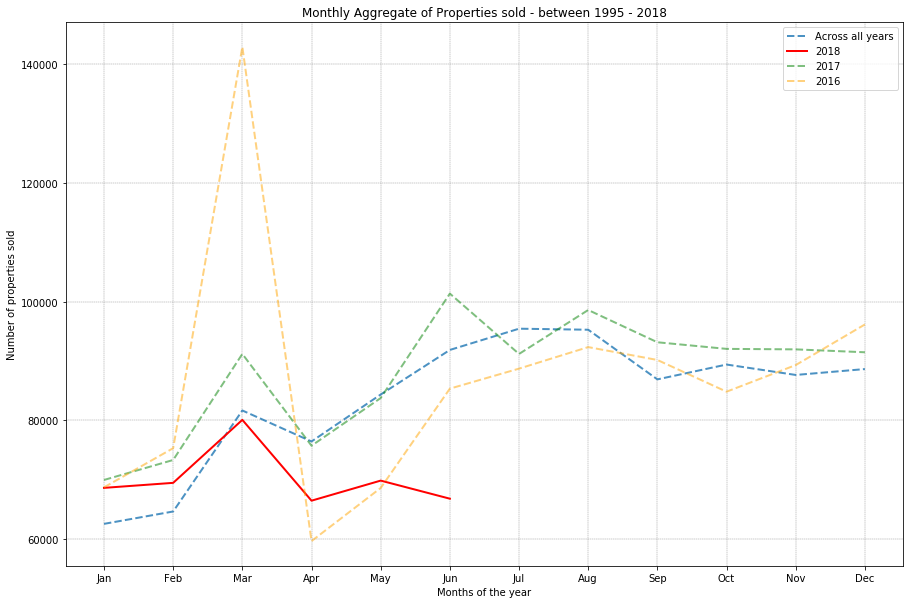

In [233]:
# Set up the figure
plt.figure(figsize=(15,10))

# Add the lines to plot
plt.plot(all_years_agg_count, '--', linewidth=2, label='Across all years', alpha=0.8)
plt.plot(this_yr_count, linewidth=2, color='red', label='2018')
plt.plot(all_agg_count.iloc[-1,], '--', linewidth=2, color='green', label='2017', alpha=0.5)
plt.plot(all_agg_count.iloc[-2,], '--', linewidth=2, color='orange', label='2016', alpha=0.5)

# Add chart lables
plt.title('Monthly Aggregate of Properties sold - between 1995 - 2018')
plt.xlabel('Months of the year')
plt.ylabel('Number of properties sold')
plt.xticks(np.arange(0, 12, 1))
plt.grid(b=True, which='major', color='grey', linestyle='--', linewidth=0.4)
plt.legend()
plt.show()

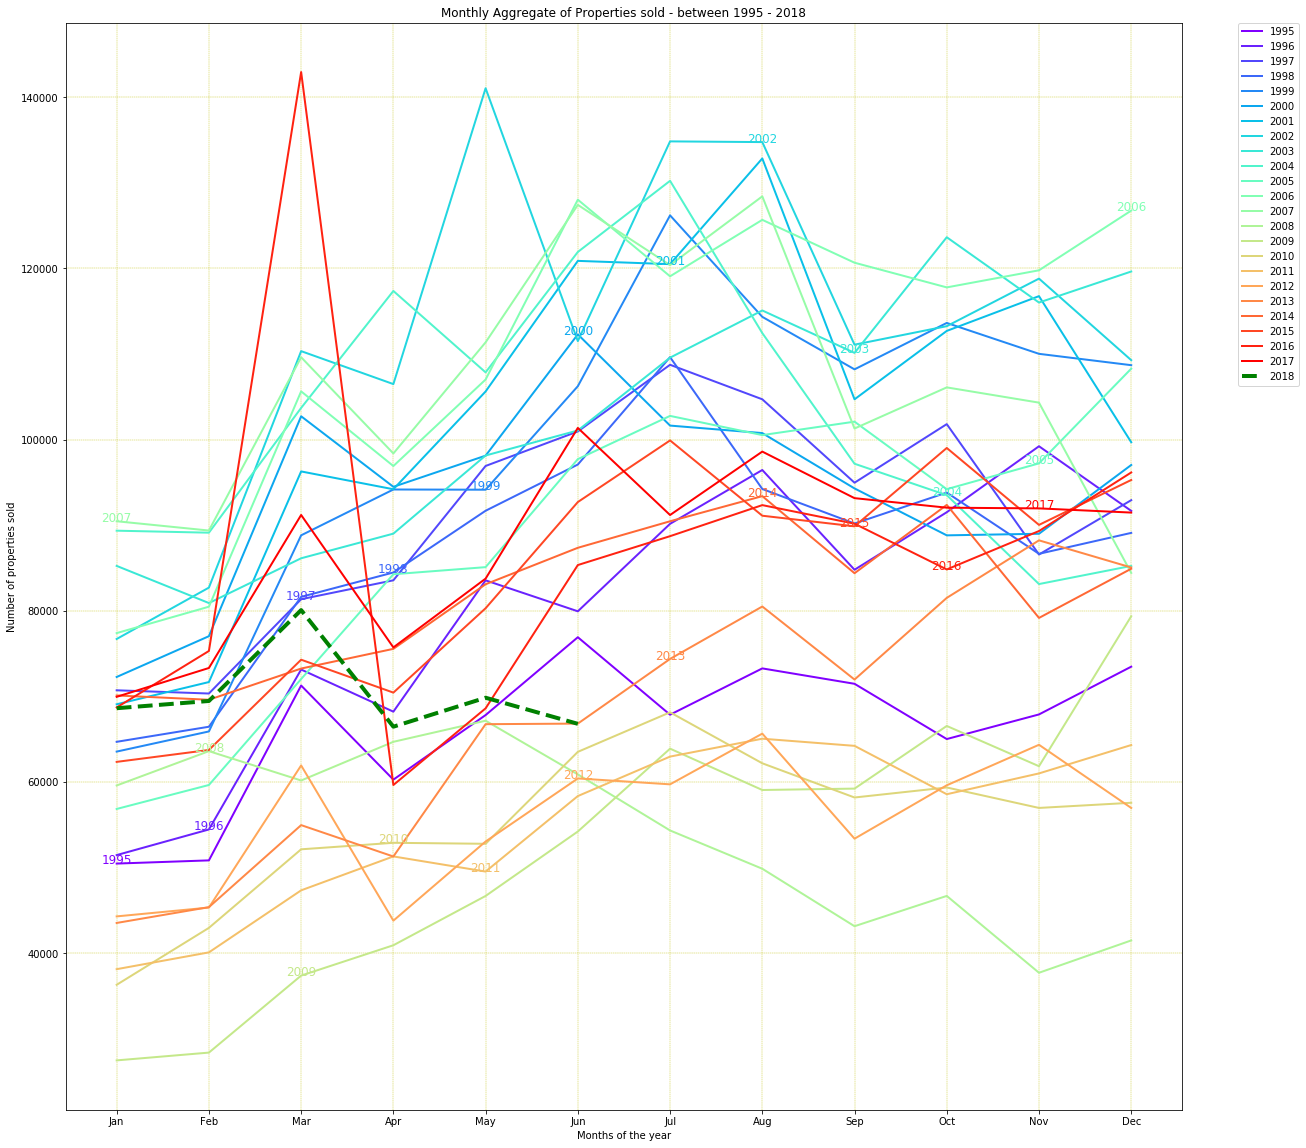

In [232]:
# Plot all years and average across this period
plt.figure(figsize=(20,20))

# Use a colourmap for the labels
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.rainbow(np.linspace(0, 1, num_plots))))

# Iterate through the dataframe and plot the columns
for i, a in enumerate(all_agg_count.index):
    lines = plt.plot(all_agg_count.loc[a], linewidth=2, label=a)

# Add an additional line from another dataframe
cur_yr_line = plt.plot(this_yr_count, '--', linewidth=4, color='green', label='2018')

# Chart labelling
plt.title('Monthly Aggregate of Properties sold - between 1995 - 2018')
plt.xlabel('Months of the year')
plt.ylabel('Number of properties sold')
plt.xticks(np.arange(0, 12, 1))
plt.grid(b=True, which='major', color='y', linestyle='--', linewidth=0.4, )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

cmap_array = plt.cm.rainbow(np.linspace(0, 1, num_plots))

x_months = list(t_all_agg_count.index.values)
cycle_months = itertools.cycle(x_months)
for i, y in enumerate(t_all_agg_count.columns.values):
    label_month =next(cycle_months)
    plt.text(label_month, t_all_agg_count.loc[label_month, y], str(y), horizontalalignment='center', color=cmap_array[i], fontsize='large')



plt.show()

In [84]:
t_all_agg_count = all_agg_count.T
t_all_agg_count

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,50456.0,51447.0,70701.0,64682.0,63539.0,72257.0,69066.0,76696.0,85234.0,89349.0,...,59580.0,27462.0,36295.0,38118.0,44285.0,43519.0,70097.0,62338.0,68699.0,69939.0
Feb,50829.0,54442.0,70324.0,66443.0,65893.0,77021.0,71664.0,82698.0,80895.0,89115.0,...,63591.0,28371.0,42945.0,40081.0,45317.0,45366.0,69595.0,63730.0,75295.0,73307.0
Mar,71259.0,73126.0,81342.0,81617.0,88808.0,102716.0,96271.0,110326.0,86126.0,103693.0,...,60163.0,37369.0,52123.0,47329.0,61922.0,54949.0,73242.0,74275.0,142937.0,91185.0
Apr,60263.0,68205.0,83552.0,84465.0,94161.0,94475.0,94190.0,106476.0,89004.0,117357.0,...,64682.0,40913.0,52882.0,51291.0,43787.0,51282.0,75543.0,70430.0,59636.0,75710.0
May,67807.0,83546.0,96910.0,91678.0,94136.0,98114.0,105613.0,141040.0,98134.0,107847.0,...,67147.0,46674.0,52767.0,49523.0,53034.0,66742.0,83091.0,80286.0,68590.0,83749.0
Jun,76900.0,79931.0,100943.0,97078.0,106229.0,112284.0,120872.0,111498.0,101058.0,121913.0,...,60873.0,54203.0,63509.0,58343.0,60402.0,66809.0,87350.0,92695.0,85334.0,101355.0
Jul,67849.0,90151.0,108733.0,109623.0,126189.0,101628.0,120491.0,134833.0,109565.0,130225.0,...,54325.0,63882.0,68129.0,62955.0,59714.0,74365.0,90449.0,99894.0,88708.0,91180.0
Aug,73259.0,96439.0,104700.0,94221.0,114332.0,100753.0,132838.0,134750.0,115078.0,112435.0,...,49852.0,59053.0,62172.0,65045.0,65639.0,80491.0,93385.0,91098.0,92336.0,98589.0
Sep,71460.0,84785.0,94955.0,90187.0,108198.0,94286.0,104697.0,111081.0,110122.0,97171.0,...,43137.0,59215.0,58176.0,64210.0,53364.0,71957.0,84380.0,89859.0,90166.0,93150.0
Oct,65004.0,91506.0,101798.0,93801.0,113621.0,88804.0,112689.0,113243.0,123634.0,93502.0,...,46677.0,66535.0,59347.0,58557.0,59603.0,81498.0,92361.0,99012.0,84820.0,92036.0


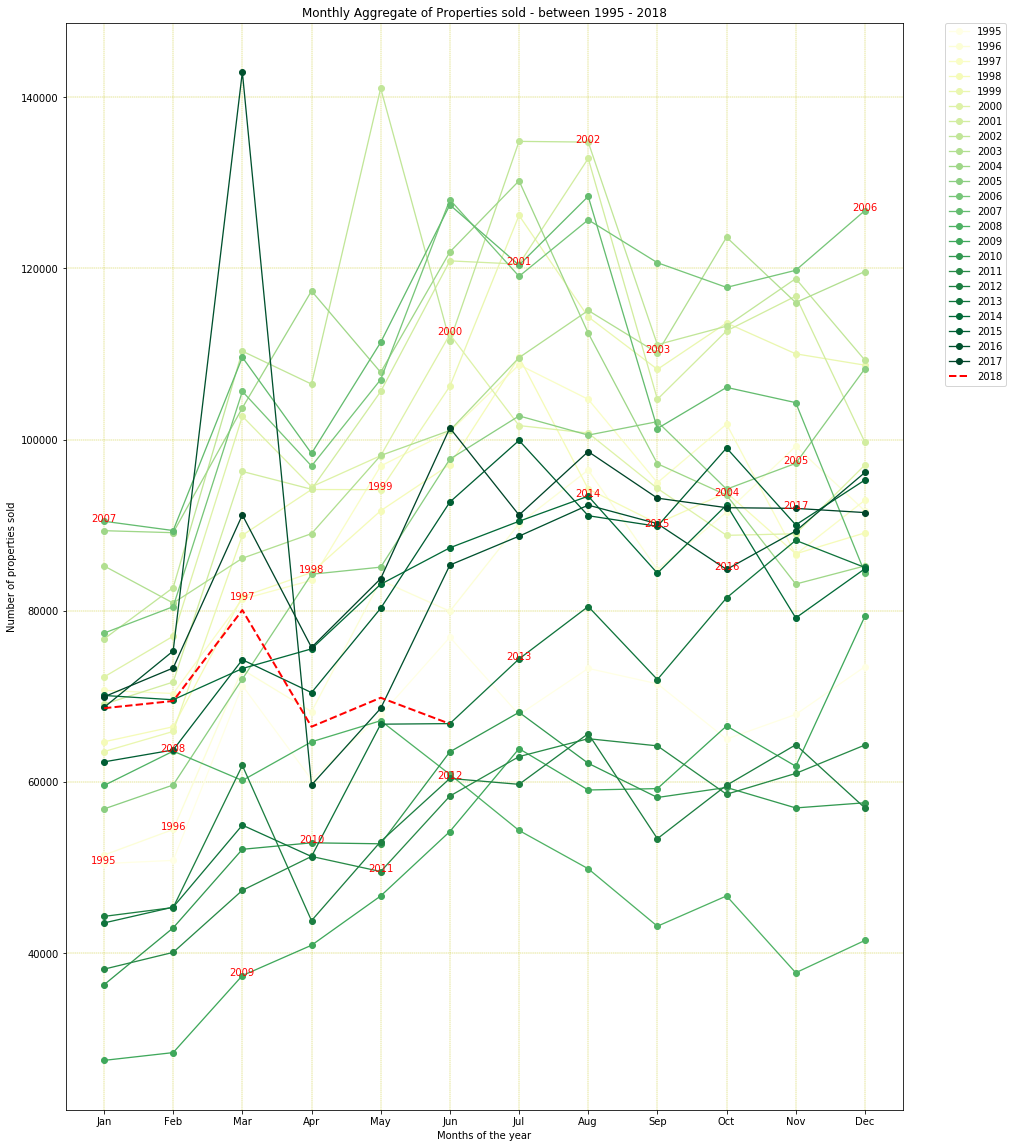

In [213]:
# Plot the graph
plt.figure(figsize=(15,20))

# Work out evenspacing through the colourmap
num_plots = len(t_all_agg_count.columns.values)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.YlGn(np.linspace(0, 1, num_plots))))

# Plot the entire dataframe
plt.plot(t_all_agg_count, linewidth=1.3, marker='o')

# Plot the additional line from another dataframe
plt.plot(this_yr_count, '--', linewidth=2, color='red')

# Chart labels
plt.title('Monthly Aggregate of Properties sold - between 1995 - 2018')
plt.xlabel('Months of the year')
plt.ylabel('Number of properties sold')
plt.xticks(np.arange(0, 12, 1))
plt.grid(b=True, which='major', color='y', linestyle='--', linewidth=0.4)

# Assign label axes
legend_labels = list(t_all_agg_count.columns.values) + ['2018']
plt.legend(labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Add the year labels to charts and iterate through x-axis to space them out
x_months = list(t_all_agg_count.index.values)
cycle_months = itertools.cycle(x_months)
for i, y in enumerate(t_all_agg_count.columns.values):
    label_month =next(cycle_months)
    plt.text(label_month, t_all_agg_count.loc[label_month, y], str(y), horizontalalignment='center', color='red')

plt.show()



In [191]:
# Normalisation methods
def normalise(df, norm_type):
    if norm_type == 'min_max':
        norm_df = (df - df.min())/(df.max() - df.min())
    elif norm_type == 'max':
        norm_df = df/df.max()
    elif norm_type == 'mean':
        norm_df = (df - df.mean())/df.std()
    elif norm_type == 'sum':
        norm_df = df/df.sum()
        
    return norm_df
    

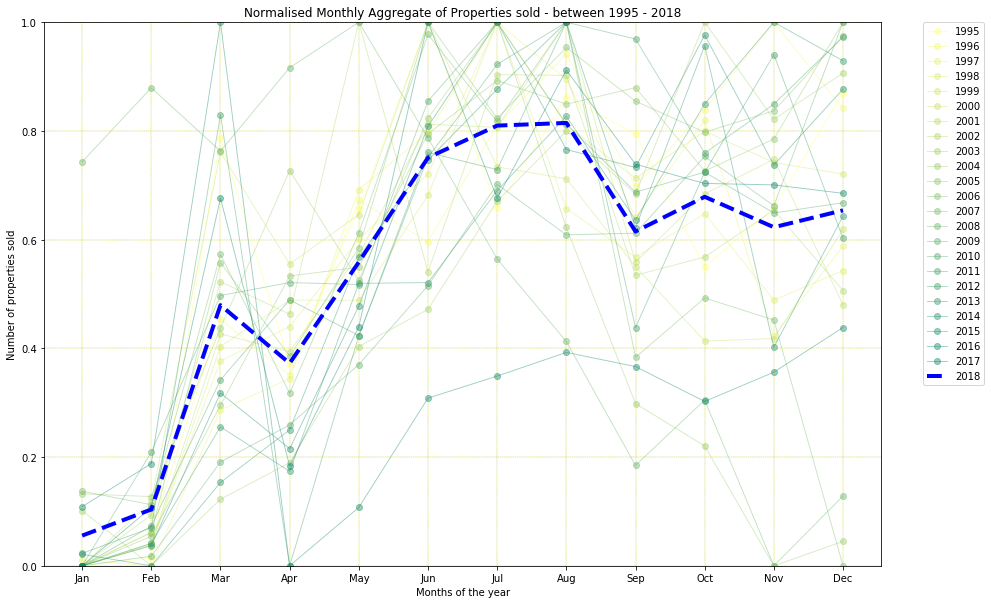

In [215]:
# Let's normalise the changes across the year (using min-max)
norm_method = 'min_max'
t_norm = normalise(df=t_all_agg_count, norm_type=norm_method)
this_yr_norm = normalise(df=this_yr_count, norm_type=norm_method)

# Normalised average of all years
norm_all_years_avg = t_norm.mean(1) 


num_plots = len(t_norm.columns.values)
plt.figure(figsize=(15,10))
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.summer(np.linspace(1, 0, num_plots))))
plt.plot(t_norm, linewidth=0.9, marker='o', alpha=0.4)
# plt.plot(this_yr_norm, '--', linewidth=4, color='red')
plt.plot(norm_all_years_avg, '--', linewidth=4, color='blue')
plt.title('Normalised Monthly Aggregate of Properties sold - between 1995 - 2018')
plt.xlabel('Months of the year')
plt.ylabel('Number of properties sold')
plt.xticks(np.arange(0, 12, 1))
plt.ylim(0,1)
plt.grid(b=True, which='major', color='y', linestyle='--', linewidth=0.4)
legend_labels = list(t_norm.columns.values) + ['2018']
plt.legend(labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


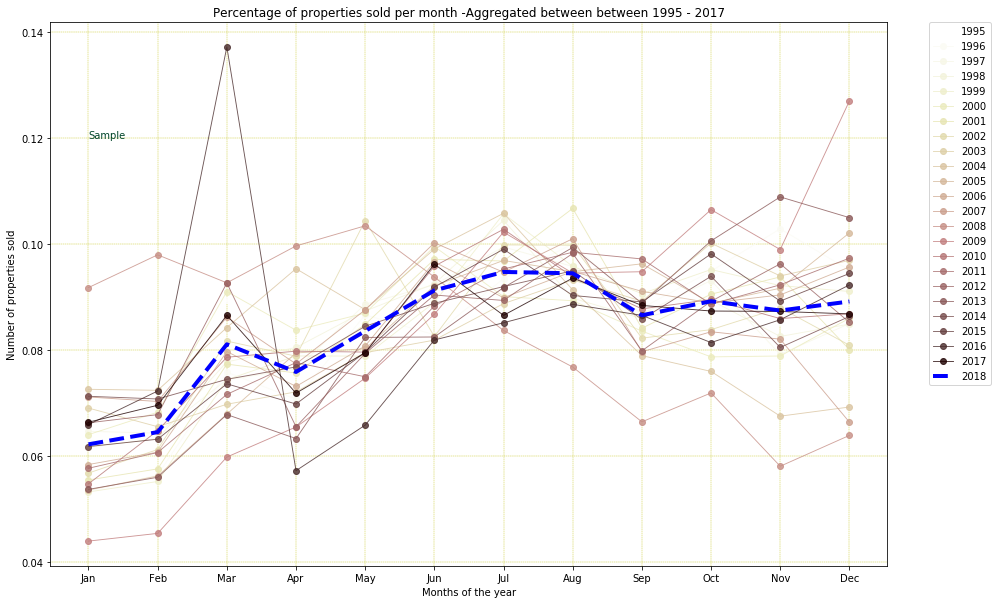

In [225]:
# What is the monthly contribution of property sales per year
norm_method = 'sum'
t_norm = normalise(df=t_all_agg_count, norm_type=norm_method)
this_yr_norm = normalise(df=this_yr_count, norm_type=norm_method)

# Normalised average of all years
norm_all_years_avg = t_norm.mean(1) 

# Plot the graph
num_plots = len(t_norm.columns.values)
plt.figure(figsize=(15,10))
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.pink(np.linspace(1, 0, num_plots))))
plt.plot(t_norm, linewidth=0.9, marker='o', alpha=0.8)
plt.plot(norm_all_years_avg, '--', linewidth=4, color='blue')
plt.title('Percentage of properties sold per month -Aggregated between between 1995 - 2017')
plt.xlabel('Months of the year')
plt.ylabel('Number of properties sold')
plt.xticks(np.arange(0, 12, 1))
plt.grid(b=True, which='major', color='y', linestyle='--', linewidth=0.4)
legend_labels = list(t_norm.columns.values) + ['2018']
plt.legend(labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

col = plt.cm.YlGn(np.linspace(0, 1, num_plots))[-1]
plt.text('Jan', 0.12, 'Sample', size='medium', color = col)

plt.show()


array([1.        , 1.        , 0.89803922, 1.        ])